# Clustering and Tree-based Classification

## 1. K-means Clustering

**Objectives**

**cluster** the data points using the 13 features. **Note:** Since we are investigating clustering, which is an unsupervised algorithm, don't use the target column when applying the K-means clustering algorithm.

**Steps:**

1. Read the dataset using Pandas. The outcome column in this dataset is `num`. Since we will be using unsupervised learning, we will not use this column. Create a feature matrix (X) with all the data points and the 13 features.

2. Perform any required data preprocessing of the features (X). This might include missing value imputation, normalization, and handling categorical columns.

3. Cluster the dataset into 2 clusters using the K-means algorithm.

4. Report the sum of squared error (SSE) by the `inertia_` for the clustering obtained in Step 3. 

5. Find the optimal number of clusters for this dataset using the "Elbow method".

### Step 1 - Read in data and create feature matrix

In [ ]:
#import necessary packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams['figure.figsize'] = (12, 10)
import pandas as pd
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hd_file = '/content/drive/MyDrive/HIDS506 - AI/HIDS506 - HW/HIDS506 - HW3/chd_processed_cleveland.csv'
hd_df = pd.read_csv(hd_file)
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
X_data = hd_df.drop(columns=["num"])

### Step 2 - Data processing 

In [ ]:
#check missing values
X_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
X_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [ ]:
#convert categorial columns with one-hot encoding (cp, restcg, slope, ca, thal, num)
X_cp = X_data['cp']
X_cp = pd.get_dummies(X_cp)

X_cp.columns = ['cp_1', 'cp_2', 'cp_3', 'cp_4']

X_restecg = X_data['restecg']
X_restecg = pd.get_dummies(X_restecg)

X_restecg.columns = ['restecg_0', 'restecg_1', 'restecg_2']

X_slope = X_data['slope']
X_slope = pd.get_dummies(X_slope)
X_slope

X_restecg.columns = ['slope_1', 'slope_2', 'slope_3']

X_ca = X_data['ca']
X_ca = pd.get_dummies(X_ca)

X_ca.columns = ['ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_?']

X_thal = X_data['thal']
X_thal = pd.get_dummies(X_thal)
X_thal

X_thal.columns = ['thal_3', 'thal_6', 'thal_7', 'thal_?']

X_pre_oneHot = X_data.drop(columns=['restecg', 'cp', 'slope', 'ca', 'thal'])

#Add back the columns after one-hot encoding
X_df_add_cp = X_pre_oneHot.join(X_cp)

X_df_add_restecg = X_df_add_cp.join(X_restecg)

X_df_add_slope = X_df_add_restecg.join(X_slope)

X_df_add_ca = X_df_add_slope.join(X_ca)

X_df = X_df_add_ca.join(X_thal)

In [ ]:
X_df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,3.0,ca_0,ca_1,ca_2,ca_3,ca_?,thal_3,thal_6,thal_7,thal_?
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,1,1,0,0,0,0,0,1,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,0,0,0,1,0,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,0,0,1,0,0,0,0,1,0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,1,1,0,0,0,0,1,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


### Step 3 - Cluster using K-Means

In [ ]:
##set KMeans estimator algorithm parameters
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=2, random_state=42)

### Step 4 - Report the Sum of Squared Errors (SSE)

In [ ]:
#Check cluster quality 

# The lowest SSE value
kmeans.inertia_

7152.972565807944

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-3.43670953e-01, -2.50690875e-01, -1.09361557e-01,
        -7.61848572e-02, -4.51745965e-02,  5.32505654e-01,
        -5.13071263e-01, -4.83796228e-01, -6.15628825e-02,
         3.93975141e-01,  3.69304780e-01, -5.93606990e-01,
         2.08599479e-01, -1.15662986e-01, -1.82244343e-01,
         6.00311510e-01, -5.68115610e-01, -6.42849711e-02,
         3.66283917e-01, -1.35401743e-01, -2.18706062e-01,
        -2.12496657e-01,  3.82990021e-04,  6.42338549e-01,
        -2.23296289e-01, -5.48271924e-01,  2.69913624e-04],
       [ 3.41409960e-01,  2.49041593e-01,  1.08642073e-01,
         7.56836410e-02,  4.48773952e-02, -5.29002327e-01,
         5.09695794e-01,  4.80613358e-01,  6.11578636e-02,
        -3.91383199e-01, -3.66875143e-01,  5.89701681e-01,
        -2.07227114e-01,  1.14902046e-01,  1.81045367e-01,
        -5.96362092e-01,  5.64378007e-01,  6.38620437e-02,
        -3.63874155e-01,  1.34510942e-01,  2.17267207e-01,
         2.11098653e-01, -3.80470350e-04, -6.38112638e-

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

10

In [ ]:
#first five predicted labels 
kmeans.labels_[:5]

array([1, 1, 1, 0, 0], dtype=int32)

since we cannot calculate impurity for continuous labels in the dataset, the weight MSE is used to calculate the impurity of a given split. The MSE essentially evaluates how accruate the centroid of the cluster is by adding the distances of the different points of a given cluster to the centroid. 

### Step 5 - what is the optimal number of clusters?

The optimal number of clusters could be 2 or 5. It could be two if we wanted to predict a binary outcome of 0 = no CHD or 1 = yes CHD. It could be five because there are 5 labels for outcomes (0 = No CHD / 1-4 = varying degrees of CHD). When checked below the inertia went down when the clustering was run using 5 clusters. further analysis using the elbow method and the kneed package below show that 2 is the optimal cluster. 

In [ ]:
##set KMeans estimator algorithm parameters
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=5, random_state=42)

In [ ]:
#Check cluster quality 

# The lowest SSE value
kmeans.inertia_

6156.148141501012

### Step 6 - Elbow Method

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

display elbow plot

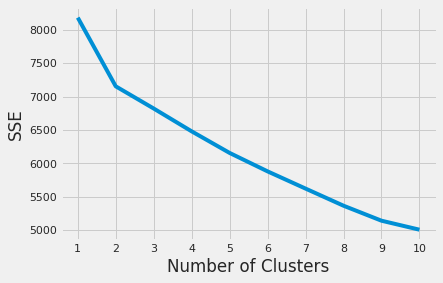

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [ ]:
kl.elbow

2

## 2. Classification using Tree-Based Classifiers

We are going to use the same dataset as used in the K-Means clustering problem above to train and test the tree-based classifiers for predicting the outcome column `num`,  which represents the presence or absence of coronary artery disease. Note: Since this is a supervised task, we will  use the target column in this question.


**Steps:**
1. Read the dataset using Pandas. The outcome column in this dataset is `num`, which has values 0, 1, 2, 3. We will transform this to a binary classification task. The column `num` represents the presence or absence of coronary artery disease in the patient with 0 representing the absence of CHD and labels 1-4 representing the presence of CHD. Create an outcome column (say "chd"), with a value of  1, indicating the presence of CHD and a value of 0, indicating the absence of CHD. Remove the column `num` as it is no longer needed.

2. Divide the dataset into feature matrix (X) and outcome arrays (y). Here the outcome  (y) is the newly created binary column that you create in 1.

3. Perform any required data preprocessing of the features (X). This might include missing value imputation, normalization, and handling categorical columns.

4. Split the dataset into training and test sets. 

5. Fit a Decision Tree Classifier (DTC) on the training set and report the classification metrics (using classification report) on the test set. Rank the features in the dataset based on features importance returned the trained DTC model.

6. Repeat Step (5) using the Random Forest Classifier. 


### Step 1/2 - read in the dataset, split into features and outcome, and create binary outcome

In [ ]:
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
X_data = hd_df.drop(columns=["num"])

In [ ]:
y_df_column = hd_df['num']

In [ ]:
y_df = hd_df['num']

In [ ]:
Counter(y_df_column)

Counter({0: 164, 1: 55, 2: 36, 3: 35, 4: 13})

In [ ]:
X_data.shape

(303, 13)

In [ ]:
y_df_column.shape

(303,)

In [ ]:
#make outcome binary - either 0 = no disease present OR 1 - disease present
y_df= np.where(y_df_column== 2, 1, y_df)
y_df= np.where(y_df_column== 3, 1, y_df)
y_df= np.where(y_df_column== 4, 1, y_df)

In [ ]:
y_df

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
Counter(y_df)

Counter({0: 164, 1: 139})

### Step 3 - Data Processing

In [ ]:
#check missing values
X_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
X_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [ ]:
#convert categorial columns with one-hot encoding (cp, restcg, slope, ca, thal, num)
X_cp = X_data['cp']
X_cp = pd.get_dummies(X_cp)

X_cp.columns = ['cp_1', 'cp_2', 'cp_3', 'cp_4']

X_restecg = X_data['restecg']
X_restecg = pd.get_dummies(X_restecg)

X_restecg.columns = ['restecg_0', 'restecg_1', 'restecg_2']

X_slope = X_data['slope']
X_slope = pd.get_dummies(X_slope)
X_slope

X_restecg.columns = ['slope_1', 'slope_2', 'slope_3']

X_ca = X_data['ca']
X_ca = pd.get_dummies(X_ca)

X_ca.columns = ['ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_?']

X_thal = X_data['thal']
X_thal = pd.get_dummies(X_thal)
X_thal

X_thal.columns = ['thal_3', 'thal_6', 'thal_7', 'thal_?']

X_pre_oneHot = X_data.drop(columns=['restecg', 'cp', 'slope', 'ca', 'thal'])

#Add back the columns after one-hot encoding
X_df_add_cp = X_pre_oneHot.join(X_cp)

X_df_add_restecg = X_df_add_cp.join(X_restecg)

X_df_add_slope = X_df_add_restecg.join(X_slope)

X_df_add_ca = X_df_add_slope.join(X_ca)

X_df = X_df_add_ca.join(X_thal)

In [ ]:
X_df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,3.0,ca_0,ca_1,ca_2,ca_3,ca_?,thal_3,thal_6,thal_7,thal_?
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,1,1,0,0,0,0,0,1,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,0,0,0,1,0,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,0,0,1,0,0,0,0,1,0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,1,1,0,0,0,0,1,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,0,1,0,0,0,0,1,0,0,0


### Step 4 - Split the data into train/test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df)

In [ ]:
X_train.shape, X_test.shape

((227, 27), (76, 27))

In [ ]:
y_train.shape, y_test.shape

((227,), (76,))

### Step 5 - Fit Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    class_names=['CHD', 'NO_CHD'],
    feature_names=X_train.columns,
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('tree.png')    

True

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8026315789473685

In [ ]:
tree.feature_importances_

array([0.        , 0.05353406, 0.        , 0.        , 0.        ,
       0.04033959, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.39749492, 0.        , 0.        , 0.        ,
       0.        , 0.11080769, 0.        , 0.29172417, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10609957, 0.        ])

In [ ]:
tree_feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": tree.feature_importances_}
).sort_values("importance", ascending=False)

In [ ]:
tree_feature_importances_df

,feature,importance
11,cp_4,0.397495
18,ca_0,0.291724
16,2.0,0.110808
25,thal_7,0.106100
1,sex,0.053534
5,thalach,0.040340
0,age,0.000000
15,1.0,0.000000
24,thal_6,0.000000
23,thal_3,0.000000


### Step 6 - Fit Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rForest = RandomForestClassifier(n_estimators=100)
rForest.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier()

In [ ]:
y_pred = rForest.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.75

In [ ]:
rForest.feature_importances_

array([0.06247592, 0.0269452 , 0.06246945, 0.07830919, 0.00684323,
       0.11604158, 0.05908953, 0.08582354, 0.01025773, 0.01062615,
       0.02511653, 0.08704486, 0.01618227, 0.00066392, 0.0146946 ,
       0.03577728, 0.0193068 , 0.00504655, 0.08955474, 0.01986155,
       0.01702803, 0.01229292, 0.00188319, 0.08057629, 0.00807188,
       0.04766244, 0.00035461])

In [ ]:
rForest_feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": rForest.feature_importances_}
).sort_values("importance", ascending=False)

In [ ]:
rForest_feature_importances_df

,feature,importance
5,thalach,0.116042
18,ca_0,0.089555
11,cp_4,0.087045
7,oldpeak,0.085824
23,thal_3,0.080576
3,chol,0.078309
0,age,0.062476
2,trestbps,0.062469
6,exang,0.059090
25,thal_7,0.047662
